In [ ]:
# Describe : This program attempts to optimize a user portfolio using the Efficient Frontier.


In [1]:
# Import the python Libraries
from pandas_datareader import data as web
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
# Get the stock symbols tickers in the portfolio
# FAANG
assets = ['SBIN.NS', 'TATACHEM.NS', 'TATASTEEL.NS', 'GAIL.NS', 'IOC.NS']

In [19]:
# Assign weights to the stock.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [20]:
# Get the Stock/Portfolio starting date
stockStarDate = '2010-01-01'

# Get the Stock/Portfolio Ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-12-08'

In [21]:
# Create the Dataframe to storethe adjusted close proce of the stock
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStarDate, end = today)['Adj Close']


In [22]:
# Show the data Frame
df

,SBIN.NS,TATACHEM.NS,TATASTEEL.NS,GAIL.NS,IOC.NS
Date,,,,,
2010-01-04,95.066895,82.193344,464.420959,60.434708,28.011845
2010-01-05,95.102180,83.393929,475.669373,60.965874,28.118677
2010-01-06,95.672699,83.014946,470.503601,60.558430,28.078613
2010-01-07,95.137444,81.296051,476.182343,62.080009,27.637934
2010-01-08,94.853218,80.158539,475.193146,62.429455,28.109768
...,...,...,...,...,...
2020-12-02,246.949997,427.350006,604.349976,116.699997,88.400002
2020-12-03,256.299988,455.399994,620.900024,118.250000,89.900002
2020-12-04,263.500000,490.899994,622.700012,119.800003,90.400002


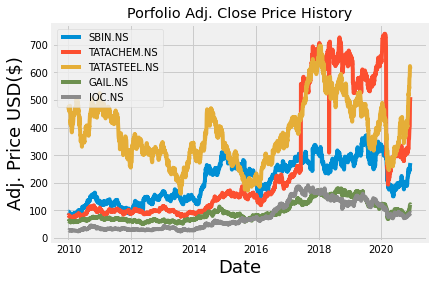

In [23]:
# Visualize the Stock/Portfolio
title = 'Porfolio Adj. Close Price History'

# Get the stocks
my_stock = df

# Creat the plot and graph
for c  in my_stock.columns.values:
  plt.plot(my_stock[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD($)', fontsize=18)
plt.legend(my_stock.columns.values, loc='upper left')
plt.show()

In [24]:
# Show the daily simple learn
returns = df.pct_change()
returns

,SBIN.NS,TATACHEM.NS,TATASTEEL.NS,GAIL.NS,IOC.NS
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.000371,0.014607,0.024220,0.008789,0.003814
2010-01-06,0.005999,-0.004544,-0.010860,-0.006683,-0.001425
2010-01-07,-0.005595,-0.020706,0.012069,0.025126,-0.015694
2010-01-08,-0.002988,-0.013992,-0.002077,0.005629,0.017072
...,...,...,...,...,...
2020-12-02,-0.004435,0.055315,0.031666,0.054201,0.029703
2020-12-03,0.037862,0.065637,0.027385,0.013282,0.016968
2020-12-04,0.028092,0.077953,0.002899,0.013108,0.005562


In [25]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SBIN.NS,TATACHEM.NS,TATASTEEL.NS,GAIL.NS,IOC.NS
SBIN.NS,0.134251,0.042276,0.060402,0.036517,0.037447
TATACHEM.NS,0.042276,0.439256,0.050351,0.027516,0.029389
TATASTEEL.NS,0.060402,0.050351,0.137314,0.039375,0.034922
GAIL.NS,0.036517,0.027516,0.039375,0.094741,0.035050
IOC.NS,0.037447,0.029389,0.034922,0.035050,0.106814


In [26]:
# Calculate the porfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06795465623526123

In [27]:
# calculat the portfolio volatility aka standar deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.26068113900944434

In [28]:
# Calculate the annual portfolio return 
portfolioSimpleAnnualRturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualRturn

0.175780321198361

In [29]:
# Show the expected annual return, volatility and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_rets = str(round(portfolioSimpleAnnualRturn, 2) * 100) + '%'

print('Expected annual Return:' + percent_rets)
print('Annual volatility / Risk:' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual Return:18.0%
Annual volatility / Risk:26.0%
Annual variance: 7.000000000000001%


In [30]:
!pip install PyPortfolioOpt

In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [32]:
# Porfolio Optimization!

# Calculated the expected returns and the annualised sampled covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df) 

# optimize the max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('SBIN.NS', 0.23825), ('TATACHEM.NS', 0.22074), ('TATASTEEL.NS', 0.0), ('GAIL.NS', 0.0255), ('IOC.NS', 0.51552)])
Expected annual return: 12.8%
Annual volatility: 28.2%
Sharpe Ratio: 0.38


(0.1275513096839362, 0.2819219290098461, 0.3814932384354534)

In [33]:
# Ge the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: $(:.2f)'.format(leftover))

Discrete allocation: {'SBIN.NS': 13, 'TATACHEM.NS': 7, 'GAIL.NS': 2, 'IOC.NS': 84}
Funds remaining: $(:.2f)
